In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import preprocessing as pp
import single_session_plots as ssp
import numpy as np
import SimilarityMatrixAnalysis as sm
import PlaceCellAnalysis as pc
import scipy as sp
import matplotlib.pyplot as plt
import h5py
from glob import glob
os.sys.path.append("C:\\Users\mplitt\s2p_processing")
import s2p_preprocessing as s2p_pp
import suite2p as s2p

%load_ext autoreload
%autoreload 2

%matplotlib qt

In [2]:
df = pp.load_session_db(twop_dir = "G:\\My Drive\\2P_Data\\Syt3KO")
# df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4261049.3\24_01_2020\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [125]:
mouse = '4343705.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
3071,4343705.2,13_01_2020,4,TwoTower_noTimeout,69,1,CA1,2020-01-13,G:\My Drive\VR_Data\TwoTower\4343705.2\13_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\13_01_202...,None
3098,4343705.2,15_01_2020,3,TwoTower_noTimeout,101,1,CA1,2020-01-15,G:\My Drive\VR_Data\TwoTower\4343705.2\15_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\15_01_202...,None
3129,4343705.2,17_01_2020,3,TwoTower_noTimeout,80,1,CA1,2020-01-17,G:\My Drive\VR_Data\TwoTower\4343705.2\17_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\17_01_202...,None
3130,4343705.2,17_01_2020,4,TwoTower_noTimeout,92,1,CA1,2020-01-17,G:\My Drive\VR_Data\TwoTower\4343705.2\17_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\17_01_202...,None
3153,4343705.2,20_01_2020,2,TwoTower_noTimeout,92,1,CA1,2020-01-20,G:\My Drive\VR_Data\TwoTower\4343705.2\20_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\20_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\20_01_202...
3154,4343705.2,20_01_2020,3,TwoTower_noTimeout,64,1,CA1,2020-01-20,G:\My Drive\VR_Data\TwoTower\4343705.2\20_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\20_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\20_01_202...
3185,4343705.2,23_01_2020,2,TwoTower_noTimeout,97,1,CA1,2020-01-23,G:\My Drive\VR_Data\TwoTower\4343705.2\23_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\23_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\23_01_202...
3186,4343705.2,23_01_2020,3,TwoTower_noTimeout,56,1,CA1,2020-01-23,G:\My Drive\VR_Data\TwoTower\4343705.2\23_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\23_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\23_01_202...
3198,4343705.2,24_01_2020,2,TwoTower_noTimeout,84,1,CA1,2020-01-24,G:\My Drive\VR_Data\TwoTower\4343705.2\24_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\24_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\24_01_202...
3199,4343705.2,24_01_2020,3,TwoTower_noTimeout,76,1,CA1,2020-01-24,G:\My Drive\VR_Data\TwoTower\4343705.2\24_01_2...,None,G:\My Drive\2P_Data\Syt3KO\4343705.2\24_01_202...,G:\My Drive\2P_Data\Syt3KO\4343705.2\24_01_202...


In [126]:
sess = df_mouse.iloc[6]

In [127]:
print(sess['s2pfolder'])

G:\My Drive\2P_Data\Syt3KO\4343705.2\23_01_2020\TwoTower_noTimeout\TwoTower_noTimeout_002_006\suite2p


In [128]:
ops = np.load(os.path.join(sess['s2pfolder'],'plane0','ops.npy')).item()
# for k,v in ops.items():
#     print(k)

In [129]:
rc = np.load(os.path.join(sess['s2pfolder'],'plane0','redcell.npy'))

In [130]:
# ops['meanImg_chan2']=redimg
redimg = ops['meanImg_chan2']

In [110]:
basedir,_ = os.path.split(os.path.split(sess['scanmat'])[0])
postdir = os.path.join(basedir,'pre')
postmats = glob(os.path.join(postdir,'*.mat'))
print(postmats)

redflag = True
i = 1
# while redflag:
info = s2p_pp.loadmat(postmats[i])
print(info['config']['wavelength']==1100)

# if info['config']['wavelength']==1100:
#         redflag == False
#     else:
#         i+=1
        
_knobby_sched = np.array(info['config']['knobby']['schedule'])
knobby_z = np.zeros([_knobby_sched.shape[0]+1,])
knobby_z[1:]=np.cumsum(_knobby_sched[:,2])
print(knobby_z)
knobby_sched = np.zeros([_knobby_sched.shape[0]+2,])
knobby_sched[1:-1]=_knobby_sched[:,-1]
knobby_sched[-1]=info['max_idx']


        
print(knobby_z)
print(np.argmin(np.abs(knobby_z+2)))
stack_ind = np.argmin(np.abs(knobby_z+2))



redstack_fname = os.path.join(postdir,postmats[i][:-4]+"_chan1.h5")
with h5py.File(redstack_fname,'r') as f:
    redimg = f['data'][stack_ind,:,:]


['G:\\My Drive\\2P_Data\\Syt3KO\\4343705.1\\17_01_2020\\pre\\pre_000_004.mat', 'G:\\My Drive\\2P_Data\\Syt3KO\\4343705.1\\17_01_2020\\pre\\pre_001_005.mat']
True
[  0. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.
   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.]
[  0. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.
   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.]
12


In [111]:
print(basedir)

G:\My Drive\2P_Data\Syt3KO\4343705.1\17_01_2020


In [131]:
f,ax = plt.subplots(figsize=[20,15])
ax.imshow(redimg,cmap='gray')
f,ax = plt.subplots(figsize=[20,15])
ax.imshow(ops['meanImg'],cmap='gray')

In [132]:
f,ax = plt.subplots()
ax.imshow(redimg,cmap='gray')

print(ops['Lx'],ops['Ly'])
# load stat file
stat = np.load(os.path.join(sess['s2pfolder'],'plane0','stat.npy'))


# plot ROIs

roi_im = np.zeros((ops['Ly'], ops['Lx']))
roi_im[:]=np.nan

for n in range(0,len(stat)):
    ypix = stat[n]['ypix']
    xpix = stat[n]['xpix']
    roi_im[ypix,xpix] = 1

ax.imshow(roi_im,alpha=.3)
# plt.imshow(im)
# plt.show()



796 512


In [42]:
# load aligned data
VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=.7,analysis='s2p')

# S/=1546
S = S/np.percentile(S,95,axis=0)[np.newaxis,:]
S[np.isnan(S)]=0.
C[np.isnan(C)]=0.

# get trial by trial info
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,
                                            VRDat['pos']._values,VRDat['tstart']._values,
                                            VRDat['teleport']._values,bin_size=10,
                                            speed = VRDat['speed']._values)
effMorph = trial_info['morphs']+trial_info['wallJitter']+trial_info['bckgndJitter']+trial_info['towerJitter']#+.3)/1.6
    
# calculate place cells


masks, FR, SI = pc.place_cells_calc(S, VRDat['pos']._values,trial_info,
                        VRDat['tstart']._values, VRDat['teleport']._values,
                        method='bootstrap',correct_only=False,speed=VRDat.speed._values,
                        win_trial_perm=True,morphlist=np.unique(trial_info['morphs']).tolist())

num aberrant ttls 0.0
25686 (25686,) (25686, 21) 71427
(71427,) (71427, 21)
8.669024759979788 1661.3851692774128
0.0 1661.2834765032846


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


VRshape (25686, 22)
F shape (894, 25686)


KeyboardInterrupt: 

In [15]:
SI[0]['all'].shape

(2368,)

696 512


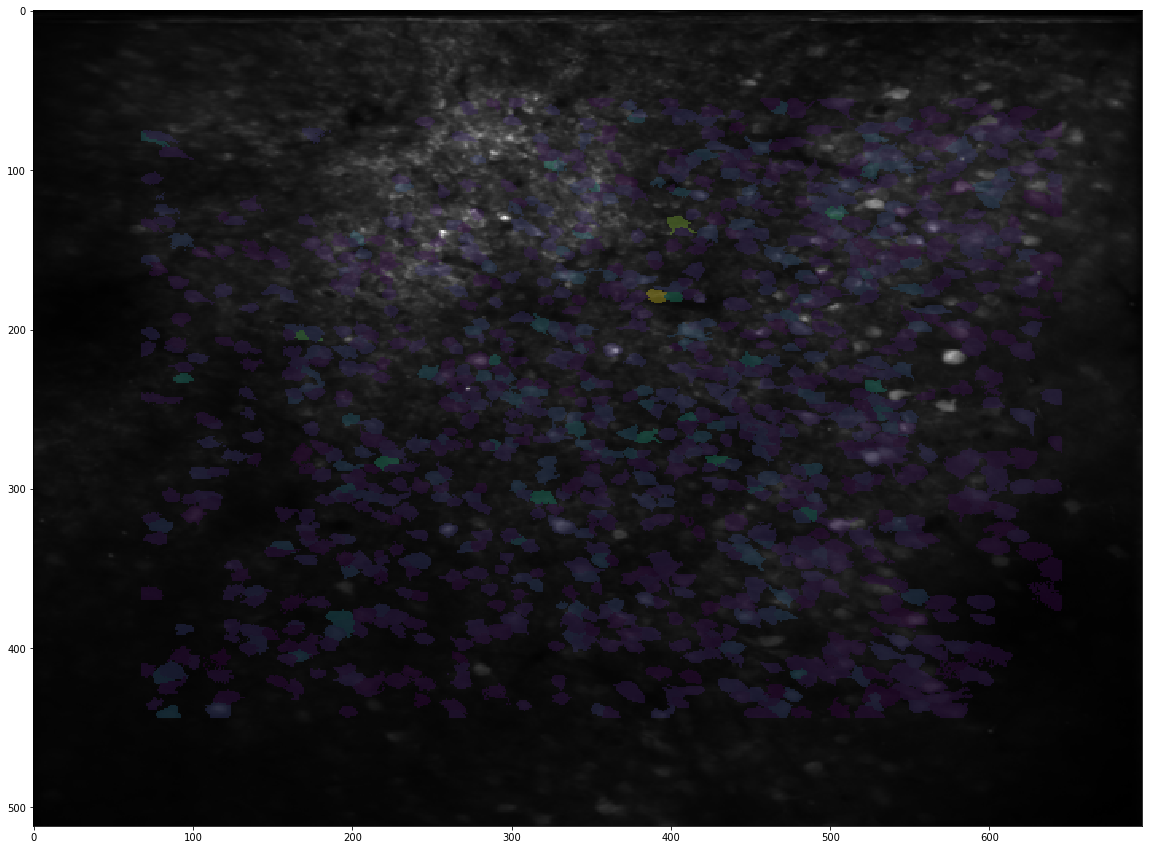

In [16]:
# plot ROIs on red image filtering by place cells

f,ax = plt.subplots(figsize=[20,15])
ax.imshow(redimg,cmap='gray')
Mask = masks[0]|masks[1]
si = SI[0]['all'] + SI[1]['all']
si_pc = si[Mask]
print(ops['Lx'],ops['Ly'])

iscell = np.load(os.path.join(sess['s2pfolder'],'plane0','iscell.npy'))
stat_cells = stat[iscell[:,0]>0]
stat_pc = stat_cells[Mask]

# plot ROIs

roi_im = np.zeros((ops['Ly'], ops['Lx']))
roi_im[:]=np.nan

for n in range(0,len(stat_pc)):
    ypix = stat_pc[n]['ypix']
    xpix = stat_pc[n]['xpix']
    roi_im[ypix,xpix] = si_pc[n]

ax.imshow(roi_im,alpha=.3)

In [42]:
f.savefig("G:\\My Drive\\2P_Data\\Syt3KO\\PlaceCellFootprintsOnMCherryBckgnd.png",format='png')

In [133]:
grnbcknd = sp.ndimage.filters.gaussian_filter(ops['meanImg'],[30,30])
f,ax = plt.subplots(1,3)
ax[0].imshow(grnbcknd)
ax[1].imshow(greenimg)
ax[2].imshow(greenimg/grnbcknd)

In [155]:
%matplotlib qt
greenimg = ops['meanImg']
grnbcknd = sp.ndimage.filters.gaussian_filter(greenimg,[50,50])
green_norm = (greenimg-grnbcknd)/grnbcknd
green_norm -=np.amin(green_norm)

redbcknd = sp.ndimage.filters.gaussian_filter(redimg,[50,50])
red_norm = (redimg-redbcknd)/redbcknd
red_norm-=np.amin(red_norm)
ovlap = green_norm*red_norm[:,:]
f,ax = plt.subplots(2,2,figsize=[10,10])
ax[0,0].imshow(green_norm,cmap='Greys_r')
ax[0,0].set_title('gcamp normalized')
ax[0,1].imshow(red_norm[:,:],cmap='Greys_r')
ax[0,1].set_title('mcherry channel normalized')
ax[1,0].imshow(ovlap,cmap='cividis')
ax[1,0].set_title('log(gcamp*mcherry)')
ax[1,1].imshow(ovlap,cmap='cividis')
zeros = np.zeros(ovlap.shape)
zeros[ovlap>np.percentile(ovlap,50)]=np.nan
ax[1,1].imshow(zeros,alpha=.9)
ax[1,1].set_title('filtered at 50th percentile with PC overlay')
ax[1,1].imshow(roi_im,alpha=.8,cmap='Reds',vmin=0,vmax=1)
f.show()

In [156]:
cimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
cimg[:,:,0]=red_norm/np.amax(red_norm.ravel())
cimg[:,:,1]=green_norm/np.amax(green_norm.ravel())
f,ax = plt.subplots()
ax.imshow(cimg)
f.show()

In [143]:
cimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
cimg[:,:,0]=redimg/np.amax(redimg.ravel())
cimg[:,:,1]=ops['meanImg_chan2']/np.amax(ops['meanImg_chan2'].ravel())
cimg[:,:,2]=ops['meanImg_chan2']/np.amax(ops['meanImg_chan2'].ravel())
f,ax = plt.subplots(1,3)
_rimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
_rimg[:,:,0]=np.copy(cimg[:,:,0])

_bimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
_bimg[:,:,1:] = np.copy(cimg[:,:,1:])
ax[0].imshow(_rimg)
ax[1].imshow(_bimg)
ax[2].imshow(cimg)
f.show()

In [137]:
#for debugging
aligned_data = redimg


In [118]:
refImg = np.copy(ops['meanImg_chan2'])
ops['bidiphase']=0
_data = redimg[np.newaxis,:,:]
maskMul,maskOffset,cfRefImg = s2p.register.prepare_masks(refImg,ops)
refAndMasks = [maskMul,maskOffset,cfRefImg]
aligned_data, yshift, xshift, corrXY, yxnr = s2p.register.register_and_shift(_data, refAndMasks,ops)



In [24]:
print(ops.keys())
print(ops['xrange'])

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'preclassify', 'save_mat', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'do_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'pre_smooth', 'spatial_taper', 'roidetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'baseline', 'win_baseline', 'sig_baseline', 'prctile_baseline', 'neucoeff', 'xrange', 'yrange', 'data_path', 'save_path', 'ops_path', 'reg_file', 'reg_file_chan2', 'meanImg', 'meanImg_chan2', 'nfr

In [146]:
cimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
# cimg[:,:,1]=ops['meanImg']/np.amax(ops['meanImg'].ravel()) 
cimg[ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1],1]= ops['max_proj']/np.amax(ops['max_proj'].ravel()) #
# cimg[:,:,1]= ops['meanImg']/np.amax(ops['meanImg']) #
cimg[ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1],0]=1
cimg[:,:,0] =cimg[:,:,0]*aligned_data/np.percentile(aligned_data.ravel(),90)


f,ax = plt.subplots(1,4)
_gimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
_gimg[:,:,1]=cimg[:,:,1]
ax[0].imshow(_rimg)
ax[1].imshow(_gimg)
ax[2].imshow(cimg)

norm_img = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
norm_img[:,:,1]= green_norm

redbcknd = sp.ndimage.filters.gaussian_filter(np.squeeze(aligned_data),[50,50])
red_norm = (np.squeeze(aligned_data)-redbcknd)/redbcknd
norm_img[:,:,0]=red_norm
ax[3].imshow(norm_img)
f.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [147]:
f,ax = plt.subplots(figsize=[20,15])
ax.imshow(red_norm,cmap='gray')
f,ax = plt.subplots(figsize=[20,15])
ax.imshow(green_norm,cmap='gray')

In [148]:
f,ax = plt.subplots()
ax.imshow(norm_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [121]:
f,ax = plt.subplots(figsize=[20,15])
ax.imshow(cimg)
Mask = masks[0]|masks[1]
print(ops['Lx'],ops['Ly'])

iscell = np.load(os.path.join(sess['s2pfolder'],'plane0','iscell.npy'))
stat_cells = stat[iscell[:,0]>0]
stat_pc = stat_cells[Mask]

# plot ROIs

roi_im = np.zeros((ops['Ly'], ops['Lx']))
roi_im[:]=np.nan

for n in range(0,len(stat_pc)):
    ypix = stat_pc[n]['ypix']
    xpix = stat_pc[n]['xpix']
    roi_im[ypix,xpix] = 1

ax.imshow(roi_im,alpha=.4,cmap='Greys')

796 512


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2922 but corresponding boolean dimension is 2368

In [149]:
f,ax = plt.subplots(2,2)


roi_im = np.zeros((ops['Ly'], ops['Lx']))
roi_im[:]=np.nan
# 705.1 , 23_01_2020 second session
# cre pos 185, 31, 98, 322, 61, 89, 220!,178, 296,298, 79, 297!,558, 36, 266, 422!, 193, 244, 757, 729, 467, 235, 599!?, 733, 732, 386!, 727!, 295, 427!, 346, 401
# cre neg 698, 50, 519, 56, 13, 302?, 110?, 10, 724,45, 39, 432, 88 , 195, 675, 72, 331, 230 , 40, 136, 60
#185, 220, 422, 386
cell = 427
ypix, xpix = stat_cells[cell]['ypix'], stat_cells[cell]['xpix']
com = [np.mean(ypix),np.mean(xpix)]
roi_im[ypix,xpix]=1

print(com)


top,bottom = np.maximum(int(com[0])-50,0), np.minimum(int(com[0])+50,roi_im.shape[0])
left,right = np.maximum(int(com[1])-50,0), np.minimum(int(com[1])+50,roi_im.shape[1])


ax[0,0].imshow(np.squeeze(cimg[top:bottom,left:right,0]),cmap='Greys_r')
ax[0,1].imshow(np.squeeze(cimg[top:bottom,left:right,1]),cmap='Greys_r')
ax[1,0].imshow(cimg[top:bottom,left:right,:])
ax[1,1].imshow(cimg[top:bottom,left:right,:])
Mask = masks[0]|masks[1]
print(ops['Lx'],ops['Ly'])

iscell = np.load(os.path.join(sess['s2pfolder'],'plane0','iscell.npy'))
stat_cells = stat[iscell[:,0]>0]
# stat_pc = stat_cells[Mask]

# plot ROIs

# roi_im = np.zeros((ops['Ly'], ops['Lx']))
# roi_im[:]=np.nan
# # 705.1 , 23_01_2020 second session
# # cre pos 185, 31, 98, 322, 61, 89, 220!,178, 296,298, 79, 297!,558, 36, 266, 422!, 193, 244, 757, 729, 467, 235, 599!?, 733, 732, 386!, 727!, 295, 427!, 346, 401
# # cre neg 698, 50, 519, 56, 13, 302?, 110?, 10, 724,45, 39, 432, 88 , 195, 675, 72, 331, 230 , 40, 136, 60
# #297, 185, 220, 422
# cell = 185
# ypix, xpix = stat_cells[cell]['ypix'], stat_cells[cell]['xpix']
# com = [np.mean(ypix),np.mean(xpix)]
# roi_im[ypix,xpix]=1


# for n in range(0,len(stat_pc)):
#     ypix = stat_cells[n]['ypix']
#     xpix = stat_cells[n]['xpix']
#     roi_im[ypix,xpix] = 1

ax[1,1].imshow(roi_im[top:bottom,left:right],alpha=.4,cmap='Greys')
ax[1,0].scatter(com[1]-left,com[0]-top,color='blue',s=1)
ax[0,0].scatter(com[1]-left,com[0]-top,color='red',s=1)
ax[0,1].scatter(com[1]-left,com[0]-top,color='red',s=1)

[392.57377049180326, 526.0737704918033]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


796 512


In [140]:
cimg = np.zeros([green_norm.shape[0],green_norm.shape[1],3])
redbcknd = sp.ndimage.filters.gaussian_filter(np.squeeze(aligned_data),[200,200])
red_norm = np.squeeze(aligned_data)/redbcknd
cimg[:,:,0]=red_norm
cimg[:,:,1]=green_norm
f,ax = plt.subplots()
# ax[0,0].imshow(cimg[:,:,0],cmap='Reds')
# ax[0,1].imshow(cimg[:,:,1])
ax.imshow(cimg)
f.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
